In [29]:
from transformers import GPT2LMHeadModel

from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Use GPT2 124M Model

In [16]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") #124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [27]:
sd_hf["transformer.wpe.weight"][0, :20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

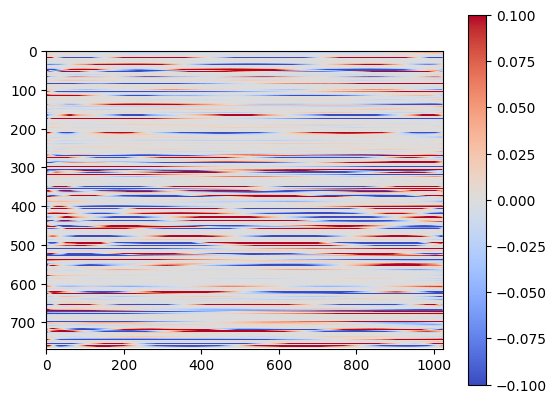

In [41]:
plt.imshow(sd_hf["transformer.wpe.weight"].T, cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar()

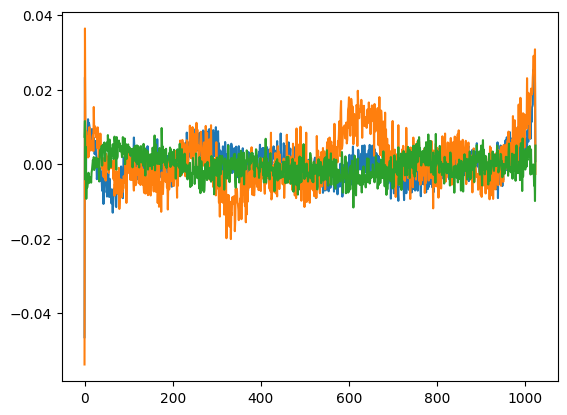

In [42]:
# select three random dimensions and see how it varies across positions. 
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 700])

(-0.5, 2303.5, 767.5, -0.5)

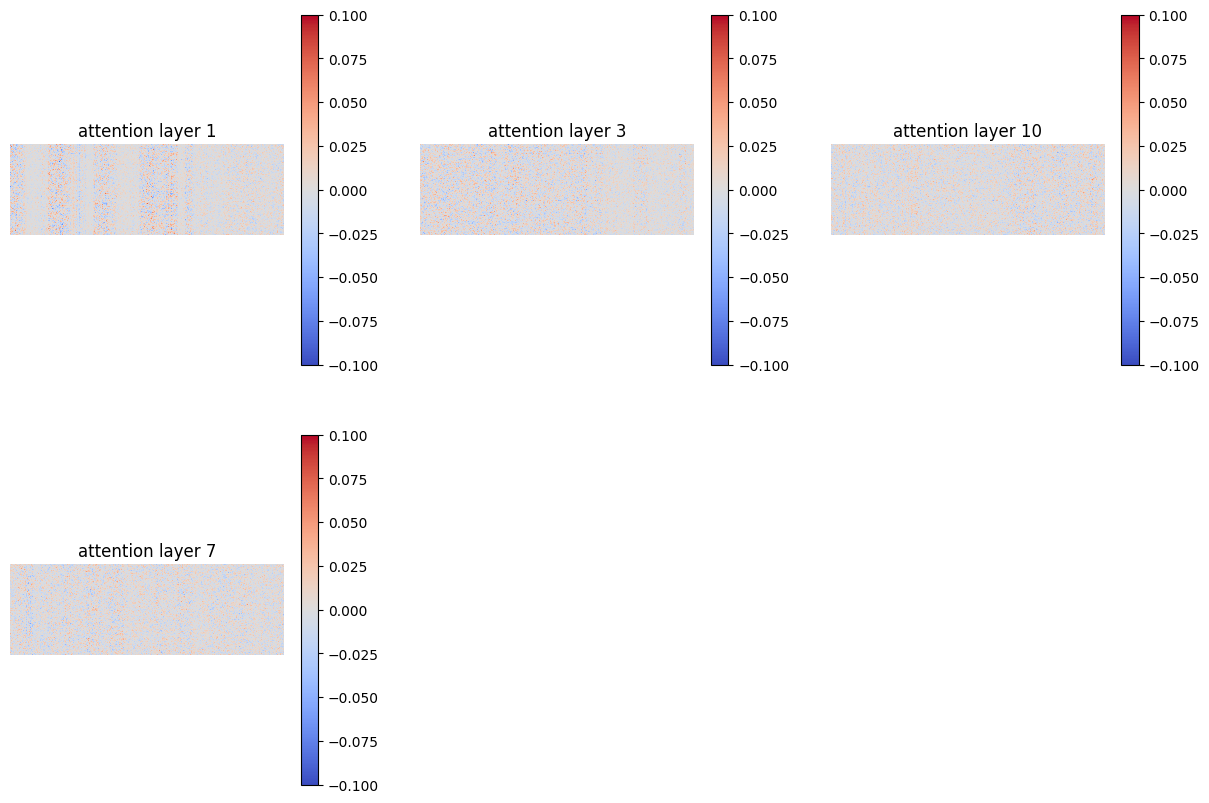

In [59]:
#look at other layers. 

plt.figure(figsize=(15, 10))
# Visualize the layers
plt.subplot(2, 3, 1)
plt.title("attention layer 1")
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:,:], cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.axis('off')

# Visualize the layers
plt.subplot(2, 3, 2)
plt.title("attention layer 3")
plt.imshow(sd_hf["transformer.h.3.attn.c_attn.weight"][:,:], cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.axis('off')

# Visualize the layers
plt.subplot(2, 3, 3)
plt.title("attention layer 10")
plt.imshow(sd_hf["transformer.h.10.attn.c_attn.weight"][:,:], cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.axis('off')

# Visualize the layers
plt.subplot(2, 3, 4)
plt.title("attention layer 7")
plt.imshow(sd_hf["transformer.h.7.attn.c_attn.weight"][:,:], cmap='coolwarm', vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.axis('off')

In [62]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42)
pprint(generator("Hello, I'm a language model", max_length = 30, num_return_sequences=5))


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language modeler. I want it to help you to "
                    "read and understand better the language models you're "
                    'using, how they work'},
 {'generated_text': "Hello, I'm a language modeler in Google and I'm doing a "
                    'lot of research on language languages. Sometimes, it is '
                    'kind of awkward to'},
 {'generated_text': "Hello, I'm a language model scientist! My dream for this "
                    'project is for students to be able to play with our '
                    'favorite words and sentences from these'},
 {'generated_text': 'Hello, I\'m a language modeler."\n'
                    '\n'
                    'Khan\'s answer is that "There are probably some more '
                    'fundamental questions to be answered before it'},
 {'generated_text': "Hello, I'm a language model teacher, and my focus is on "
                    'making a beautiful language (and, yes, learning a 